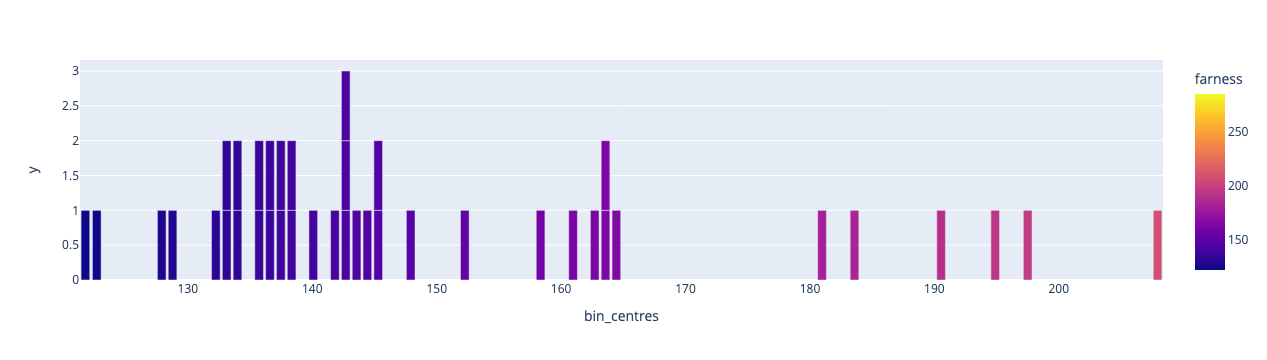

In [3]:
from src.distances import dmat_and_order
import numpy as np
import plotly.express as px
import pandas as pd

dmat, dmat_sym, order = dmat_and_order("movies", "vega-lite", "nmi")

df = pd.DataFrame(dict(slug=order, farness=np.mean(dmat, axis=1)))

df["bin_centres"] = pd.cut(df["farness"], bins = 100).apply(lambda x: float(x.mid)).astype(float)

px.bar(df, x="bin_centres", y=px.Constant(1), hover_data=["slug"], color="farness", 
       range_color=[df["bin_centres"].min(), df["bin_centres"].median()*2])

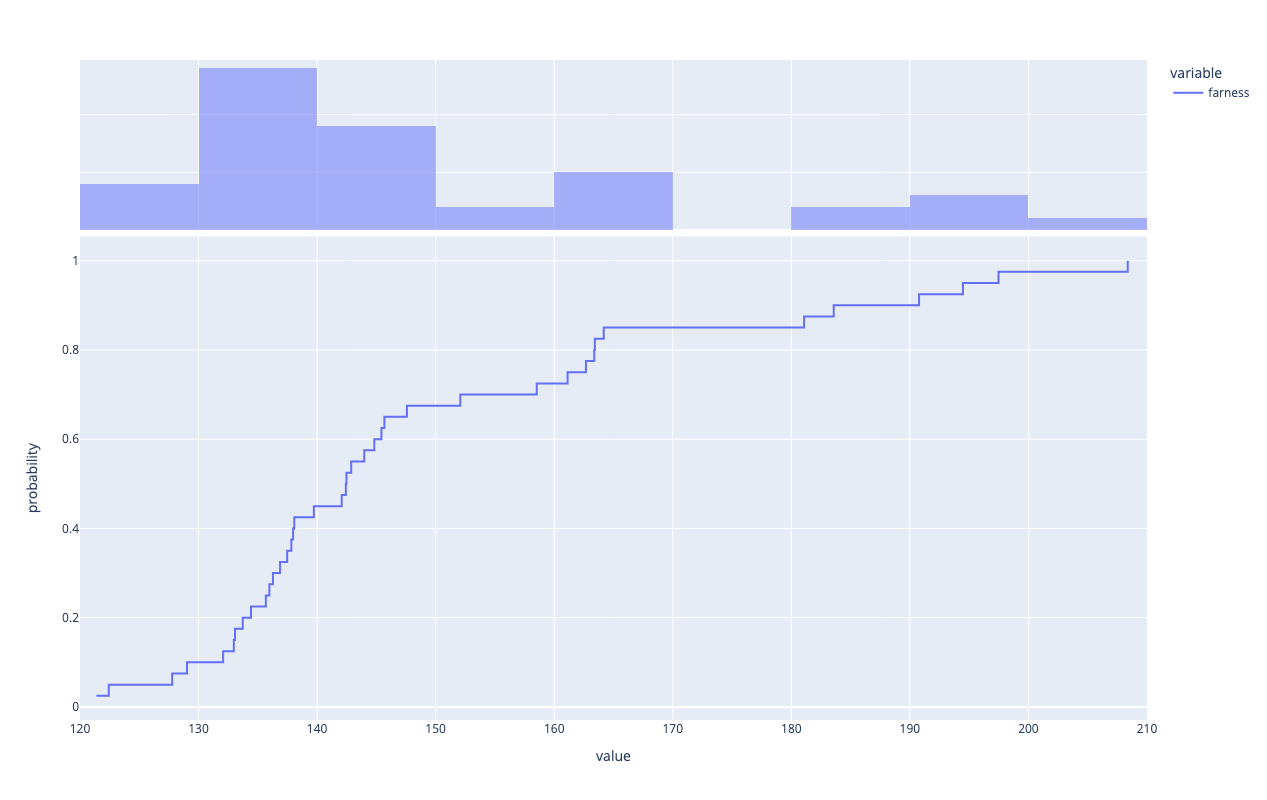

In [6]:
px.ecdf(df["farness"], marginal="histogram", height=800)